<a href="https://colab.research.google.com/github/jucadar/Datos-Poryecto-Experimental/blob/main/Data_Proyect_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
!pip install uncertainties
from uncertainties import ufloat
from uncertainties.umath import * 
import pandas as pd
import scipy as sp
from uncertainties import unumpy
from scipy.constants import *
from scipy import stats
from scipy.signal import find_peaks
import csv
import statistics

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sin', 'pi', 'log10', 'log', 'floor', 'ceil', 'expm1', 'e', 'degrees', 'fmod', 'frexp', 'isnan', 'modf', 'radians', 'hypot', 'trunc', 'log1p', 'ldexp', 'fabs', 'copysign', 'exp', 'tan', 'cos', 'cosh', 'sqrt', 'bar', 'tanh', 'isinf', 'sinh', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# **g**

**Sin filtro**

In [ ]:
data14 = pd.read_csv('1_4_Coincidencias.csv') #Carga datos
data15 = pd.read_csv('1_5_Coincidencias.csv') #Carga datos
data16 = pd.read_csv('1_6_Coincidencias.csv') #Carga datos
data17 = pd.read_csv('1_7_Coincidencias.csv') #Carga datos
data19 = pd.read_csv('1_9_Coincidencias.csv') #Carga datos
data20 = pd.read_csv('2_0_Coincidencias.csv') #Carga datos
data21 = pd.read_csv('2_1_Coincidencias.csv') #Carga datos
data22 = pd.read_csv('2_2_Coincidencias.csv') #Carga datos

In [ ]:
ND = [1.4,1.5,1.6,1.7,1.9,2.0,2.1,2.2]
T = np.array([data14['t (s) - HBT Measurement'],data15['t (s) - HBT Measurement'],data16['t (s) - HBT Measurement'],data17['t (s) - HBT Measurement'],data19['t (s) - HBT Measurement'],data20['t (s) - HBT Measurement'],data21['t (s) - HBT Measurement'],data22['t (s) - HBT Measurement']])
t = []
for i in range(shape(T)[0]):
    tc = [0]
    for j in T[i][1:]:
        if j[-1] == 'p': #pasa de ps a ns
            tc.append(float(j[:-1:].replace(',','.'))/1000)    
        else:
            tc.append(float(j[:-1:].replace(',','.')))
    t.append(tc)

In [ ]:
N = np.array([data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement']])
n = []
for i in range(shape(N)[0]):
    nc = []
    for j in N[i]:
        nc.append(j)
    n.append(nc)

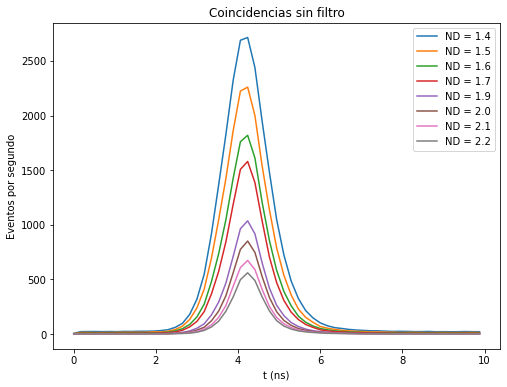

In [ ]:
figure(figsize=(8,6))
for i in range(len(ND)):
    plot(t[i],n[i], label = 'ND = %.1f' %(ND[i]))
    legend()
    xlabel('t (ns)')
    ylabel('Eventos por segundo')
    title('Coincidencias sin filtro')
savefig('Counts_W')

In [ ]:
# Ptau = []
# Pcoin = []
# for i in range(len(ND)):
#     ct = []
#     cc = []
#     # for j in range(15,35,2):
#     #     ct.append(t[i][j])
#     # for j in range(15,35,2):
#     #     cc.append(n[i][j])
#     for j in range(5,55,5):
#         ct.append(t[i][j])
#     for j in range(5,55,5):
#         cc.append(n[i][j])
#     Ptau.append(ct)
#     Pcoin.append(cc)

In [ ]:
Ptau = []
Pcoin = []
for i in range(len(ND)):
    ct = []
    cc = []
    m_index = n[i].index(max(n[i]))
    tau = np.std(t[i])
    x = linspace(t[i][m_index]-tau/2,t[i][m_index]+tau/2,10)
    I = []
    C = []
    for j in t[i]:
        if abs(t[i][m_index] - j) < tau/2:
            ct.append(j)
            cc.append(n[i][t[i].index(j)])
    for k in x:
        d = abs(k-np.array(ct)).tolist()
        I.append(ct[d.index(min(d))])
        C.append(cc[d.index(min(d))])

    Ptau.append(I)
    Pcoin.append(C)

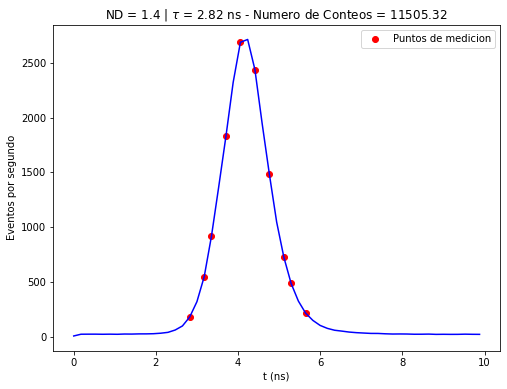

In [ ]:
figure(figsize=(8,6))
plot(t[0],n[0], c = 'b')
scatter(Ptau[0],Pcoin[0], c = 'r', label = 'Puntos de medicion')
title(r'ND = 1.4 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(Ptau[0][-1]-Ptau[0][0],sum(Pcoin[0])))
xlabel('t (ns)')
ylabel('Eventos por segundo')
legend()
savefig('Sum_first')

In [ ]:
# Ptau = []
# Pcoin = []
# for i in range(len(ND)):
#     ct = []
#     cc = []
#     for j in range(15,35,2):
#         ct.append(t[i][j])
#     for j in range(15,35,2):
#         cc.append(n[i][j])
#     # for j in range(5,55,5):
#     #     ct.append(t[i][j])
#     # for j in range(5,55,5):
#     #     cc.append(n[i][j])
#     Ptau.append(ct)
#     Pcoin.append(cc)

In [ ]:
# figure(figsize=(8,6))
# plot(t[1],n[1], c = 'b')
# scatter(Ptau[1],Pcoin[1], c = 'r', label = 'Puntos de medicion')
# title(r'ND = 1.5 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(Ptau[1][-1]-Ptau[1][0],sum(Pcoin[1])))
# xlabel('t (ns)')
# ylabel('Eventos por segundo')
# legend()
# savefig('Sum_second')

In [ ]:
# figure(figsize=(8,6))
# plot(t[1],n[1], c = 'b')
# scatter(t[1],n[1], c = 'r', label = 'Puntos de medicion')
# title(r'ND = 1.5 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(t[1][-1]-t[1][0],sum(n[1])))
# xlabel('t (ns)')
# ylabel('Eventos por segundo')
# legend()
# savefig('Sum_third')

**Con filtro**

In [ ]:
data14 = pd.read_csv('1_4_CoincidenciasF.csv') #Carga datos
data15 = pd.read_csv('1_5_CoincidenciasF.csv') #Carga datos
data16 = pd.read_csv('1_6_CoincidenciasF.csv') #Carga datos
data17 = pd.read_csv('1_7_CoincidenciasF.csv') #Carga datos
data19 = pd.read_csv('1_9_CoincidenciasF.csv') #Carga datos
data20 = pd.read_csv('2_0_CoincidenciasF.csv') #Carga datos
data21 = pd.read_csv('2_1_CoincidenciasF.csv') #Carga datos
data22 = pd.read_csv('2_2_CoincidenciasF.csv') #Carga datos

In [ ]:
ND = [1.4,1.5,1.6,1.7,1.9,2.0,2.1,2.2]
TF = np.array([data14['t (s) - HBT Measurement'],data15['t (s) - HBT Measurement'],data16['t (s) - HBT Measurement'],data17['t (s) - HBT Measurement'],data19['t (s) - HBT Measurement'],data20['t (s) - HBT Measurement'],data21['t (s) - HBT Measurement'],data22['t (s) - HBT Measurement']])
tF = []
for i in range(shape(TF)[0]):
    tc = [0]
    for j in TF[i][1:]:
        if j[-1] == 'p': #pasa de ps a ns
            tc.append(float(j[:-1:].replace(',','.'))/1000)    
        else:
            tc.append(float(j[:-1:].replace(',','.')))
    tF.append(tc)

In [ ]:
NF = np.array([data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement']])
nF = []
for i in range(shape(NF)[0]):
    nc = []
    for j in NF[i]:
        nc.append(j)
    nF.append(nc)

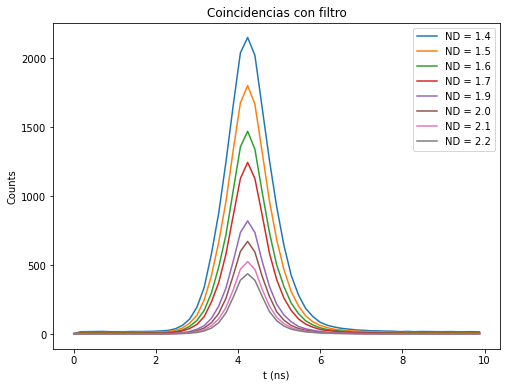

In [ ]:
figure(figsize=(8,6))
for i in range(len(ND)):
    plot(tF[i],nF[i], label = 'ND = %.1f' %(ND[i]))
    legend()
    xlabel('t (ns)')
    ylabel('Counts')
    title('Coincidencias con filtro')
savefig('CountsF')

In [ ]:
PtauF = []
PcoinF = []
for i in range(len(ND)):
    ct = []
    cc = []
    for j in range(15,35,2):
        ct.append(tF[i][j])
    for j in range(15,35,2):
        cc.append(nF[i][j])
    # for j in range(5,55,5):
    #     ct.append(tF[i][j])
    # for j in range(5,55,5):
    #     cc.append(nF[i][j])
    PtauF.append(ct)
    PcoinF.append(cc)

In [ ]:
PtauF = []
PcoinF = []
for i in range(len(ND)):
    ct = []
    cc = []
    m_index = nF[i].index(max(nF[i]))
    tau = np.std(tF[i])
    x = linspace(tF[i][m_index]-tau/2,tF[i][m_index]+tau/2,10)
    I = []
    C = []
    for j in tF[i]:
        if abs(tF[i][m_index] - j) < tau/2:
            ct.append(j)
            cc.append(nF[i][t[i].index(j)])
    for k in x:
        d = abs(k-np.array(ct)).tolist()
        I.append(ct[d.index(min(d))])
        C.append(cc[d.index(min(d))])

    PtauF.append(I)
    PcoinF.append(C)

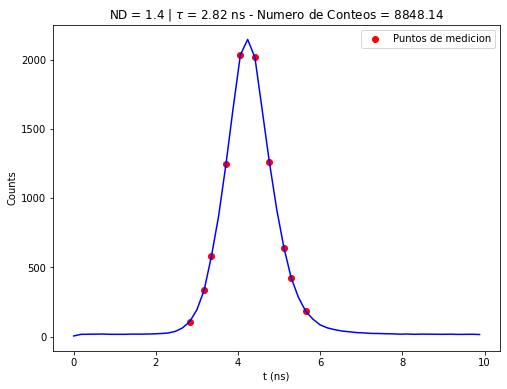

In [ ]:
figure(figsize=(8,6))
plot(tF[0],nF[0], c = 'b')
scatter(PtauF[0],PcoinF[0], c = 'r', label = 'Puntos de medicion')
title(r'ND = 1.4 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(PtauF[0][-1]-PtauF[0][0],sum(PcoinF[0])))
xlabel('t (ns)')
ylabel('Counts')
legend()

# **Voltage**

In [ ]:
t14 = []
V14 = []
with open('1_4_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t14.append(float(row[0].replace(',','.')))
        V14.append(float(row[1].replace(',','.')))

t15 = []
V15 = []
with open('1_5_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t15.append(float(row[0].replace(',','.')))
        V15.append(float(row[1].replace(',','.')))

t16 = []
V16 = []
with open('1_6_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t16.append(float(row[0].replace(',','.')))
        V16.append(float(row[1].replace(',','.')))

t17 = []
V17 = []
with open('1_7_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t17.append(float(row[0].replace(',','.')))
        V17.append(float(row[1].replace(',','.')))

t19 = []
V19 = []
with open('1_9_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t19.append(float(row[0].replace(',','.')))
        V19.append(float(row[1].replace(',','.')))

t20 = []
V20 = []
with open('2_0_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t20.append(float(row[0].replace(',','.')))
        V20.append(float(row[1].replace(',','.')))

t21 = []
V21 = []
with open('2_1_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t21.append(float(row[0].replace(',','.')))
        V21.append(float(row[1].replace(',','.')))

t22 = []
V22 = []
with open('2_2_voltaje.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t22.append(float(row[0].replace(',','.')))
        V22.append(float(row[1].replace(',','.')))

In [ ]:
P = [mean(V14),mean(V15),mean(V16),mean(V17),mean(V19),mean(V20),mean(V21),mean(V22)]
ND = [1.4,1.5,1.6,1.7,1.9,2.0,2.1,2.2]

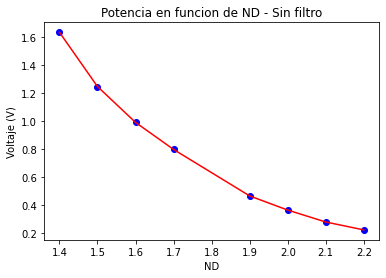

In [ ]:
plot(ND,P, c = 'r')
scatter(ND,P, c = 'b')
xlabel('ND')
ylabel('Voltaje (V)')
title('Potencia en funcion de ND - Sin filtro')
savefig('Potencia')

In [ ]:
t14 = []
V14 = []
with open('1_4_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t14.append(float(row[0].replace(',','.')))
        V14.append(float(row[1].replace(',','.')))

t15 = []
V15 = []
with open('1_5_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t15.append(float(row[0].replace(',','.')))
        V15.append(float(row[1].replace(',','.')))

t16 = []
V16 = []
with open('1_6_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t16.append(float(row[0].replace(',','.')))
        V16.append(float(row[1].replace(',','.')))

t17 = []
V17 = []
with open('1_7_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t17.append(float(row[0].replace(',','.')))
        V17.append(float(row[1].replace(',','.')))

t19 = []
V19 = []
with open('1_9_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t19.append(float(row[0].replace(',','.')))
        V19.append(float(row[1].replace(',','.')))

t20 = []
V20 = []
with open('2_0_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t20.append(float(row[0].replace(',','.')))
        V20.append(float(row[1].replace(',','.')))

t21 = []
V21 = []
with open('2_1_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t21.append(float(row[0].replace(',','.')))
        V21.append(float(row[1].replace(',','.')))

t22 = []
V22 = []
with open('2_2_voltajeF.txt', 'r') as f:
    next(f)
    next(f)
    next(f)
    next(f)
    next(f)
    reader = csv.reader(f, delimiter = '\t')
    for row in reader:
        t22.append(float(row[0].replace(',','.')))
        V22.append(float(row[1].replace(',','.')))

In [ ]:
P = [mean(V14),mean(V15),mean(V16),mean(V17),mean(V19),mean(V20),mean(V21),mean(V22)]
ND = [1.4,1.5,1.6,1.7,1.9,2.0,2.1,2.2]

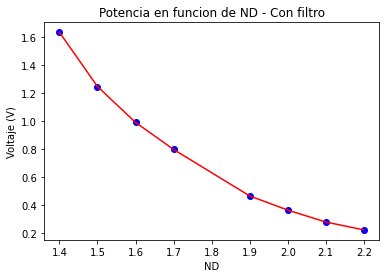

In [ ]:
plot(ND,P, c = 'r')
scatter(ND,P, c = 'b')
xlabel('ND')
ylabel('Voltaje (V)')
title('Potencia en funcion de ND - Con filtro')
savefig('PotenciaF')

# **Counts**

In [ ]:
data14 = pd.read_csv('1_4_Conteos.csv') #Carga datos
data15 = pd.read_csv('1_5_Conteos.csv') #Carga datos
data16 = pd.read_csv('1_6_Conteos.csv') #Carga datos
data17 = pd.read_csv('1_7_Conteos.csv') #Carga datos
data19 = pd.read_csv('1_9_Conteos.csv') #Carga datos
data20 = pd.read_csv('2_0_Conteos.csv') #Carga datos
data21 = pd.read_csv('2_1_Conteos.csv') #Carga datos
data22 = pd.read_csv('2_2_Conteos.csv') #Carga datos

In [ ]:
Ts = [data14['Time - Singles 1'],data15['Time - Singles 1'],data16['Time - Singles 1'],data17['Time - Singles 1'],data19['Time - Singles 1'],data20['Time - Singles 1'],data21['Time - Singles 1'],data22['Time - Singles 1']]
for i in range(len(Ts)):
    Ts[i] = Ts[i]-Ts[i][0]
D1 = [data14['Count rates (per second) - Singles 1'],data15['Count rates (per second) - Singles 1'],data16['Count rates (per second) - Singles 1'],data17['Count rates (per second) - Singles 1'],data19['Count rates (per second) - Singles 1'],data20['Count rates (per second) - Singles 1'],data21['Count rates (per second) - Singles 1'],data22['Count rates (per second) - Singles 1']]
d1 = []
D2 = [data14['Count rates (per second) - Singles 2'],data15['Count rates (per second) - Singles 2'],data16['Count rates (per second) - Singles 2'],data17['Count rates (per second) - Singles 2'],data19['Count rates (per second) - Singles 2'],data20['Count rates (per second) - Singles 2'],data21['Count rates (per second) - Singles 2'],data22['Count rates (per second) - Singles 2']]
d2 = []
C = [data14['Count rates (per second) - Coinc 1+2'],data15['Count rates (per second) - Coinc 1+2'],data16['Count rates (per second) - Coinc 1+2'],data17['Count rates (per second) - Coinc 1+2'],data19['Count rates (per second) - Coinc 1+2'],data20['Count rates (per second) - Coinc 1+2'],data21['Count rates (per second) - Coinc 1+2'],data22['Count rates (per second) - Coinc 1+2']]
c = []
for i in range(len(D1)):
    dc1 = []
    dc2 = []
    cc = []
    for j in D1[i]:
        dc1.append(float(j[:-1:].replace(',','.'))*1000)
    for j in D2[i]:
        dc2.append(float(j[:-1:].replace(',','.'))*1000)
    for j in C[i]:
        cc.append(float(j[:-1:].replace(',','.'))*1000)
    d1.append(dc1)
    d2.append(dc2)
    c.append(cc)

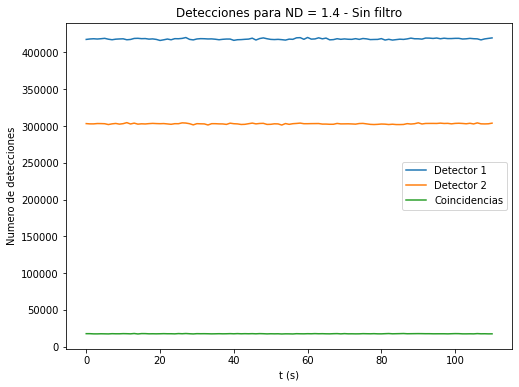

In [ ]:
figure(figsize=(8,6))
plot(Ts[0],d1[0], label = 'Detector 1')
plot(Ts[0],d2[0], label = 'Detector 2')
plot(Ts[0],c[0], label = 'Coincidencias')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Detecciones para ND = 1.4 - Sin filtro')
legend()
savefig('Detecciones')

In [ ]:
singles1 = []
singles2 = []
Coin = []
for i in range(len(ND)):
    singles1.append(mean(d1[i]))
    singles2.append(mean(d2[i]))
    Coin.append(sum(Pcoin[i])) 

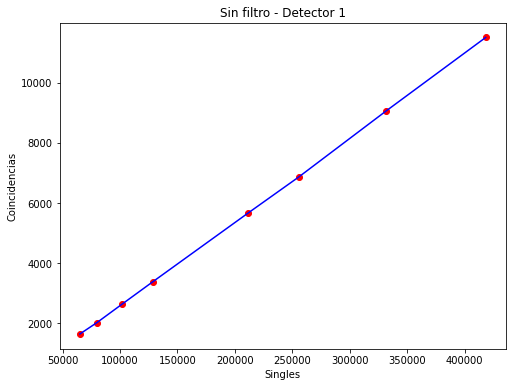

In [ ]:
figure(figsize=(8,6))
plot(singles1, Coin, c = 'b')
scatter(singles1, Coin, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Sin filtro - Detector 1')
savefig('Singles1Vcoin_NoFilter')

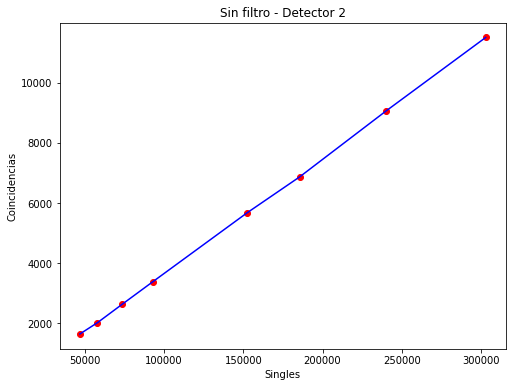

In [ ]:
figure(figsize=(8,6))
plot(singles2, Coin, c = 'b')
scatter(singles2, Coin, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Sin filtro - Detector 2')
savefig('Singles2Vcoin_NoFilter')

In [ ]:
data14 = pd.read_csv('1_4_ConteosF.csv') #Carga datos
data15 = pd.read_csv('1_5_ConteosF.csv') #Carga datos
data16 = pd.read_csv('1_6_ConteosF.csv') #Carga datos
data17 = pd.read_csv('1_7_ConteosF.csv') #Carga datos
data19 = pd.read_csv('1_9_ConteosF.csv') #Carga datos
data20 = pd.read_csv('2_0_ConteosF.csv') #Carga datos
data21 = pd.read_csv('2_1_ConteosF.csv') #Carga datos
data22 = pd.read_csv('2_2_ConteosF.csv') #Carga datos

In [ ]:
TFs = [data14['Time - Singles 1'],data15['Time - Singles 1'],data16['Time - Singles 1'],data17['Time - Singles 1'],data19['Time - Singles 1'],data20['Time - Singles 1'],data21['Time - Singles 1'],data22['Time - Singles 1']]
for i in range(len(TFs)):
    TFs[i] = TFs[i]-TFs[i][0]
DF1 = [data14['Count rates (per second) - Singles 1'],data15['Count rates (per second) - Singles 1'],data16['Count rates (per second) - Singles 1'],data17['Count rates (per second) - Singles 1'],data19['Count rates (per second) - Singles 1'],data20['Count rates (per second) - Singles 1'],data21['Count rates (per second) - Singles 1'],data22['Count rates (per second) - Singles 1']]
dF1 = []
DF2 = [data14['Count rates (per second) - Singles 2'],data15['Count rates (per second) - Singles 2'],data16['Count rates (per second) - Singles 2'],data17['Count rates (per second) - Singles 2'],data19['Count rates (per second) - Singles 2'],data20['Count rates (per second) - Singles 2'],data21['Count rates (per second) - Singles 2'],data22['Count rates (per second) - Singles 2']]
dF2 = []
CF = [data14['Count rates (per second) - Coinc 1+2'],data15['Count rates (per second) - Coinc 1+2'],data16['Count rates (per second) - Coinc 1+2'],data17['Count rates (per second) - Coinc 1+2'],data19['Count rates (per second) - Coinc 1+2'],data20['Count rates (per second) - Coinc 1+2'],data21['Count rates (per second) - Coinc 1+2'],data22['Count rates (per second) - Coinc 1+2']]
cF = []
for i in range(len(DF1)):
    dc1 = []
    dc2 = []
    cc = []
    for j in DF1[i]:
        dc1.append(float(j[:-1:].replace(',','.'))*1000)
    for j in DF2[i]:
        dc2.append(float(j[:-1:].replace(',','.'))*1000)
    for j in CF[i]:
        cc.append(float(j[:-1:].replace(',','.'))*1000)
    dF1.append(dc1)
    dF2.append(dc2)
    cF.append(cc)

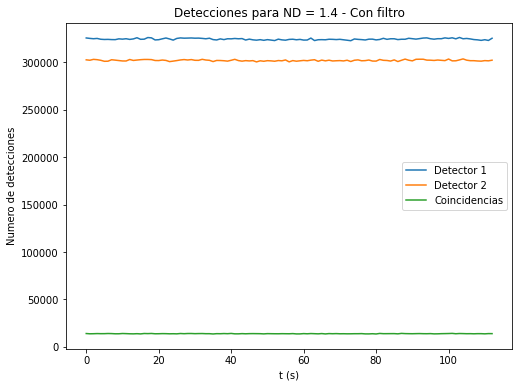

In [ ]:
figure(figsize=(8,6))
plot(TFs[0],dF1[0], label = 'Detector 1')
plot(TFs[0],dF2[0], label = 'Detector 2')
plot(TFs[0],cF[0], label = 'Coincidencias')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Detecciones para ND = 1.4 - Con filtro')
legend()
savefig('Detecciones_Filtro')

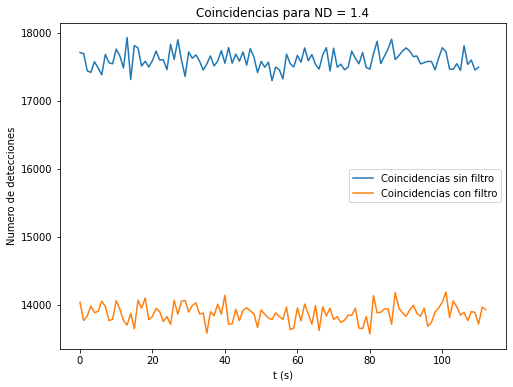

In [ ]:
figure(figsize=(8,6))
plot(Ts[0],c[0], label = 'Coincidencias sin filtro')
plot(TFs[0],cF[0], label = 'Coincidencias con filtro')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Coincidencias para ND = 1.4')
legend()
savefig('Coincidencias_F_y_NF')

In [ ]:
singles1F = []
singles2F = []
CoinF = []
for i in range(len(ND)):
    singles1F.append(mean(dF1[i]))
    singles2F.append(mean(dF2[i]))
    CoinF.append(sum(PcoinF[i]))

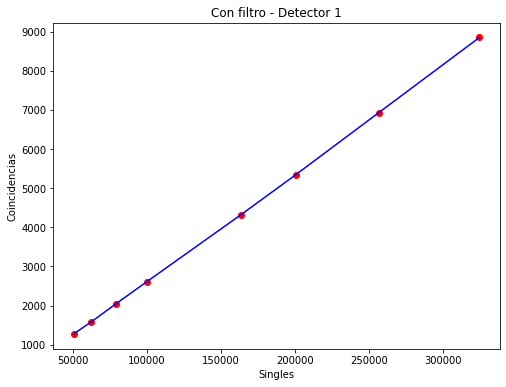

In [ ]:
figure(figsize=(8,6))
plot(singles1F, CoinF, c = 'b')
scatter(singles1F, CoinF, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Con filtro - Detector 1')
savefig('Singles1Vcoin_Filter')

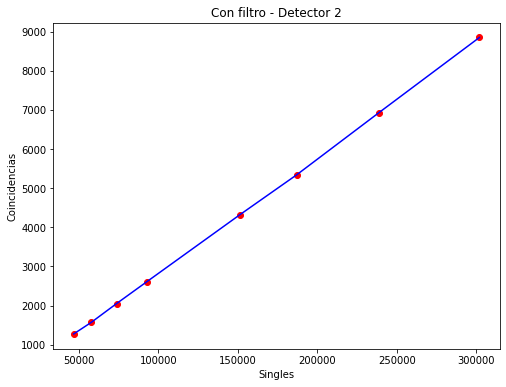

In [ ]:
figure(figsize=(8,6))
plot(singles2F, CoinF, c = 'b')
scatter(singles2F, CoinF, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Con filtro - Detector 2')
savefig('Singles2Vcoin_Filter')

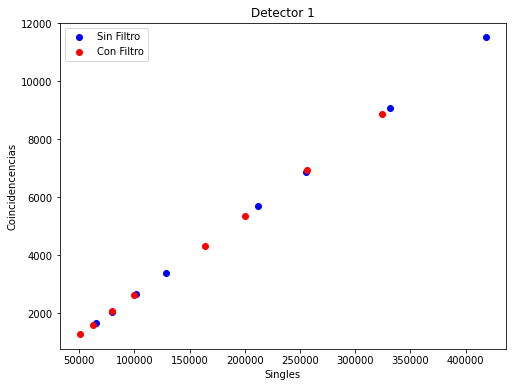

In [ ]:
# for i in range(len(ND)):
#     scatter(singles1[i], Coin[i], label = '.%1f' %(ND[i]))
#     scatter(singles1F[i], CoinF[i], label = '.%1f' %(ND[i]))
figure(figsize=(8,6))
scatter(singles1, Coin, label = 'Sin Filtro', c = 'b')
scatter(singles1F, CoinF, label = 'Con Filtro', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 1')
savefig('Singles1Vcoin')

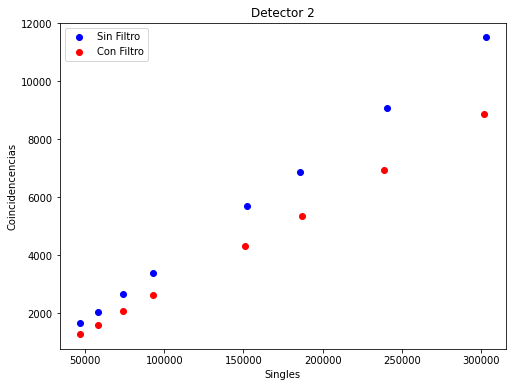

In [ ]:
figure(figsize=(8,6))
scatter(singles2, Coin, label = 'Sin Filtro', c = 'b')
scatter(singles2F, CoinF, label = 'Con Filtro', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 2')
savefig('Singles2Vcoin')

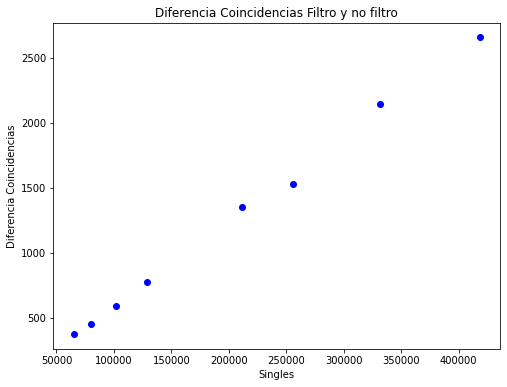

In [ ]:
D = np.array(Coin)-np.array(CoinF)
figure(figsize=(8,6))
scatter(singles1,D, c = 'b')
xlabel('Singles')
ylabel('Diferencia Coincidencias')
title('Diferencia Coincidencias Filtro y no filtro')
savefig('Diff')